In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Assignment3.csv')

In [3]:
df.head()

,x1,x2,x3,x4,x5,y
0,7.11,-447.71,135.66,92.41,96.04,9131.40
1,7.06,-455.33,94.49,91.76,92.16,9001.86
2,6.89,-466.86,186.25,89.54,100.00,8595.85
3,7.25,-440.53,176.83,94.24,84.64,9469.94
4,7.24,-445.92,185.90,94.11,88.36,9448.98


In [4]:
df.isna().sum()

x1    0
x2    0
x3    0
x4    0
x5    0
y     0
dtype: int64

There are no missing values, so lets try to build the OLS solution.

w = (X.T X)^(-1) . X.T y

In [5]:
X = df[['x1','x2','x3','x4','x5']]
y = df['y']

In [6]:
X.shape, y.shape

((101, 5), (101,))

In [7]:
w = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)),X.T),y)


In [8]:
w, w.shape

(0    24425.715147
 1        1.254953
 2       -2.333437
 3    -1772.541186
 4        1.422800
 dtype: float64,
 (5,))

In [9]:
w = w.to_numpy()
w=w.reshape(5,1)
w.shape

(5, 1)

In [10]:
y_pred = np.matmul(X,w)

In [11]:
y.shape, y_pred.shape

((101,), (101, 1))

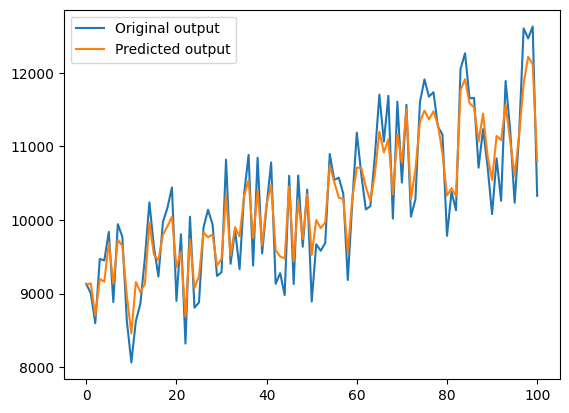

In [12]:
plt.plot(y, label = 'Original output')
plt.plot(y_pred, label = 'Predicted output')
plt.legend()
plt.show()

In [13]:
# Compute the SSE
sse_ols = float(np.sum((y-y_pred.to_numpy().reshape(101))**2))
sse_ols

10236318.183006853

## EDA

In [14]:
df.describe()

,x1,x2,x3,x4,x5,y
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,7.548713,23.755050,111.371386,98.133762,34.000000,10244.460297
std,0.380115,292.850177,55.812213,4.942089,30.557704,1022.766123
min,6.680000,-466.860000,9.800000,86.830000,0.000000,8062.540000
25%,7.250000,-208.890000,66.380000,94.240000,6.760000,9469.940000
50%,7.530000,38.950000,104.180000,97.900000,25.000000,10187.660000
75%,7.800000,262.920000,168.160000,101.420000,57.760000,10866.630000
max,8.370000,546.880000,195.810000,108.850000,100.000000,12631.050000


In [15]:
df.corr()

,x1,x2,x3,x4,x5,y
x1,1.000000,0.702276,-0.223697,0.999978,-0.001449,0.998214
x2,0.702276,1.000000,-0.032603,0.703196,0.002613,0.716703
x3,-0.223697,-0.032603,1.000000,-0.224808,0.081322,-0.220265
x4,0.999978,0.703196,-0.224808,1.000000,-0.001777,0.998266
x5,-0.001449,0.002613,0.081322,-0.001777,1.000000,0.046610
y,0.998214,0.716703,-0.220265,0.998266,0.046610,1.000000


Here, we can observe that x1, x2 and x4 has more correlation with the target y variable. Thus we may use `selectKbest` in future to find the solution efficiently.

array([[<Axes: title={'center': 'x1'}>, <Axes: title={'center': 'x2'}>],
       [<Axes: title={'center': 'x3'}>, <Axes: title={'center': 'x4'}>],
       [<Axes: title={'center': 'x5'}>, <Axes: title={'center': 'y'}>]],
      dtype=object)

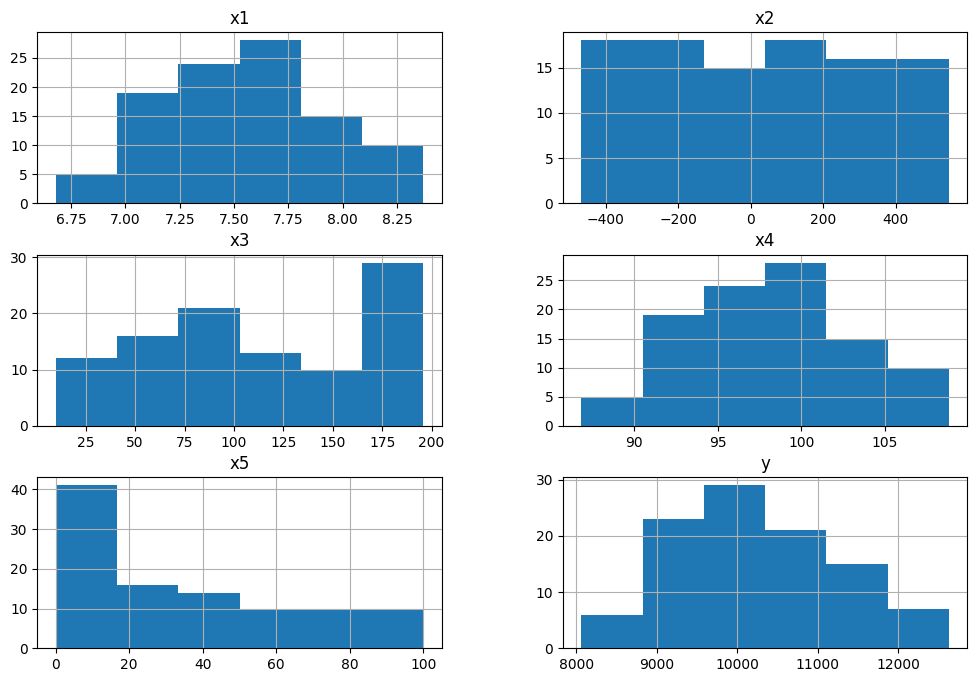

In [16]:
df.hist(bins=6, figsize=(12,8))

We can see that x1 and x4 resembles the distribution of y and also highly correlates with y.

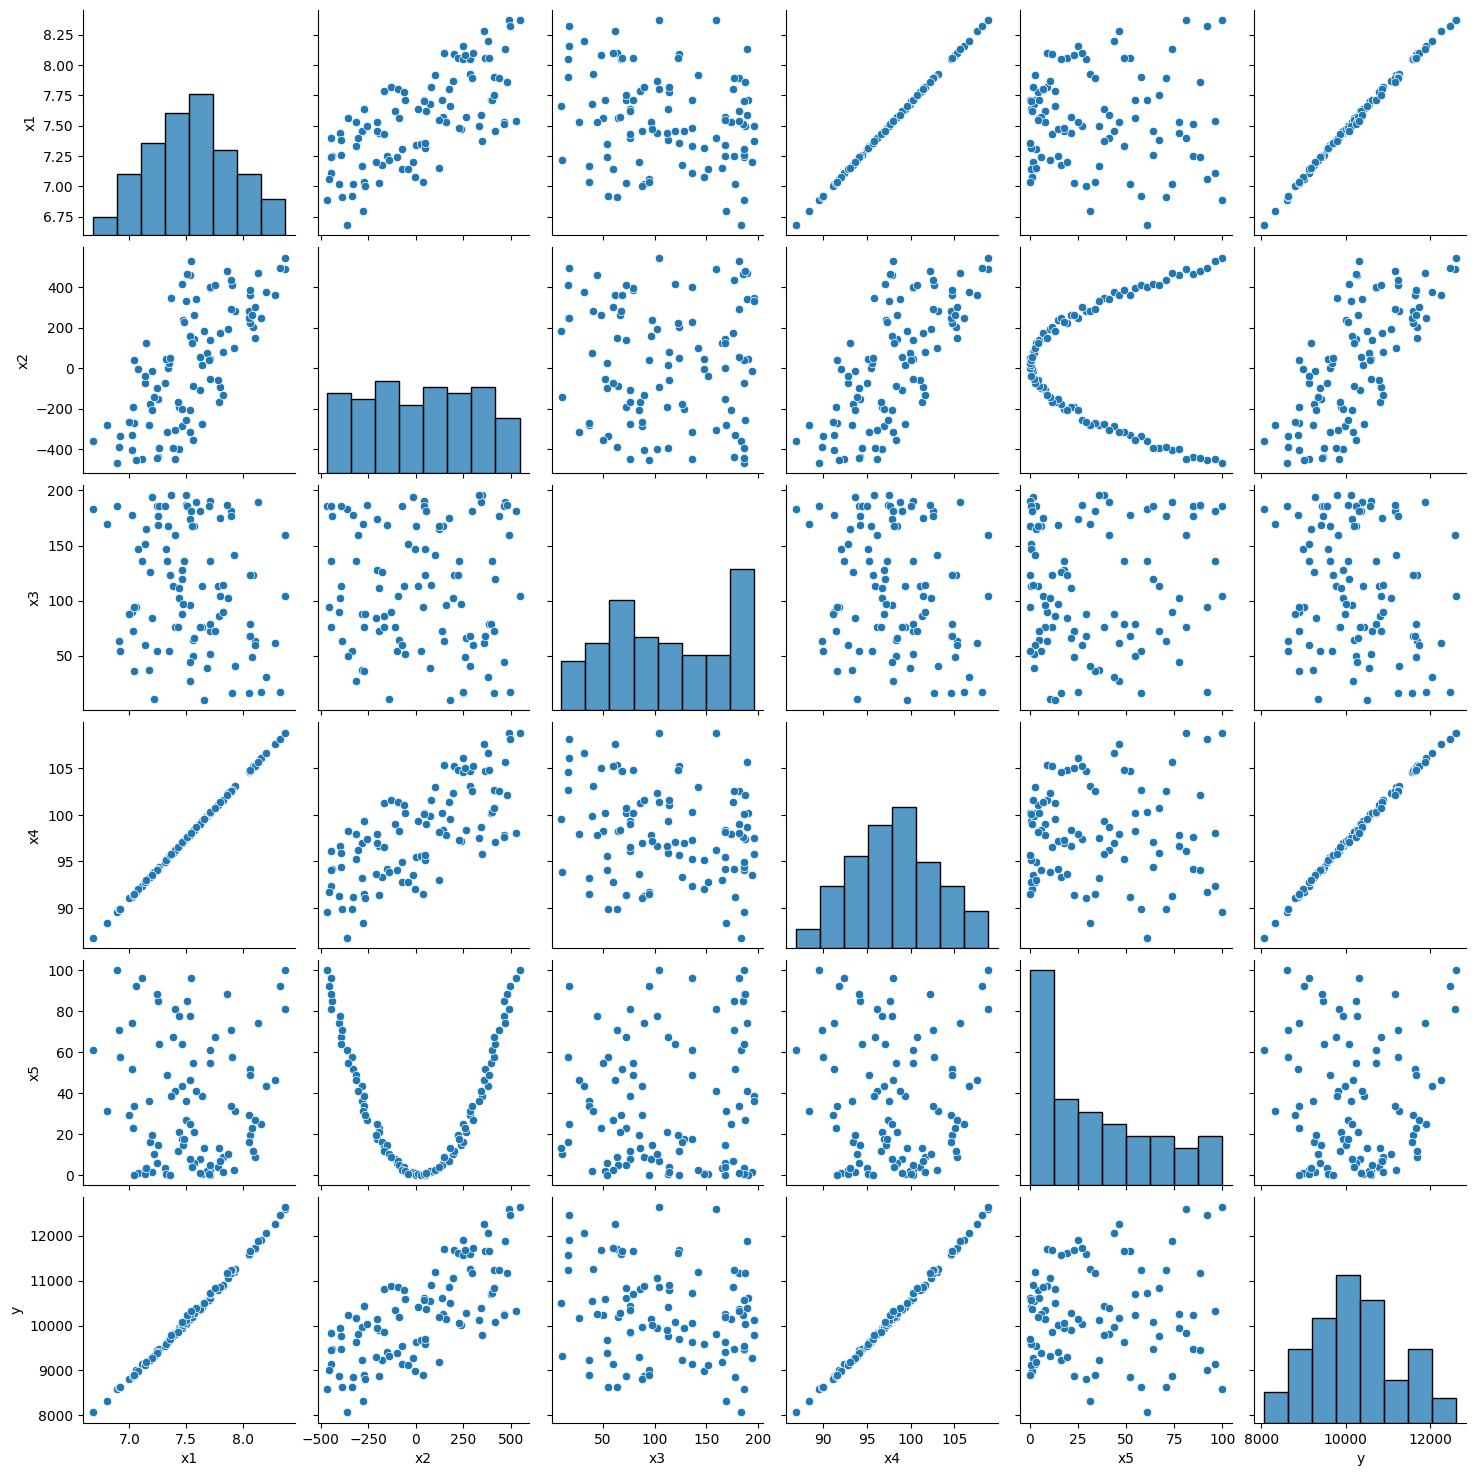

In [17]:
sns.pairplot(df)

- In the last col, we can see that x1 and x4 are linearly related to y. x2 has an directly proportional relation with y (not as strong as x1 and x4).

- Interesting observation, x2 and x5 has some quadratic relation (need to investigate it further)

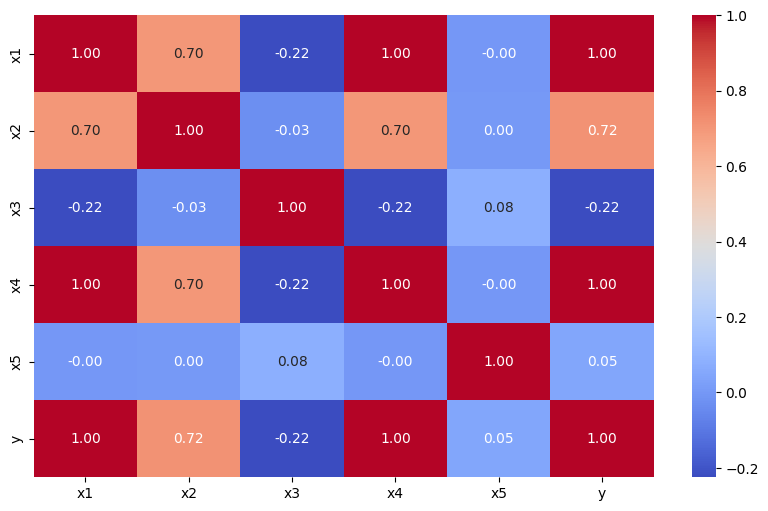

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Hatmap also confirms the strong relation between x1 and x4 with y. Maybe we can perform a regression task only with x1 and x4 cols and check the sse value.

## Data Preprocessing

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = df.drop('y', axis=1)
y = df['y']

In [20]:
X_scaled = scaler.fit_transform(X)

In [21]:
X_scaled.shape

(101, 5)

In [22]:
# Now, lets compute the new w with scaled features.

w_scale = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_scaled.T, X_scaled)),X_scaled.T),y)


In [23]:
w_scale, w_scale.shape

(array([-403.70931819,   29.33197923,   -3.17531536, 1398.37427111,
          49.51586954]),
 (5,))

In [24]:
y_pred_scale = np.matmul(X_scaled,w_scale)
y_pred_scale.shape

(101,)

In [25]:
sse_scale = float(np.sum((y-(y_pred_scale).reshape(101))**2))
sse_scale

10599917522.360546

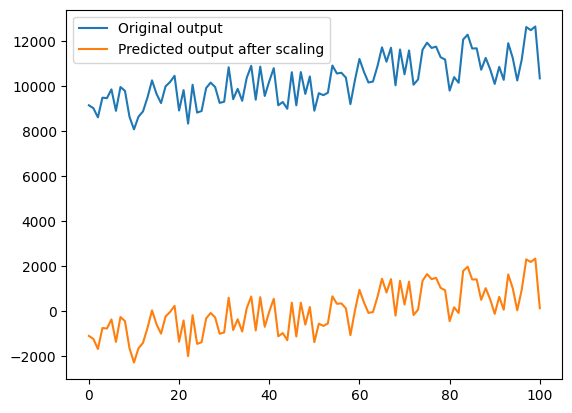

In [26]:
plt.plot(y, label = 'Original output')
plt.plot(y_pred_scale, label = 'Predicted output after scaling')
plt.legend()
plt.show()

The reason for displacement is the lack of bias term, lets introduce one more feature called as bias with value 1 for all x

In [27]:
X_scaled = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])

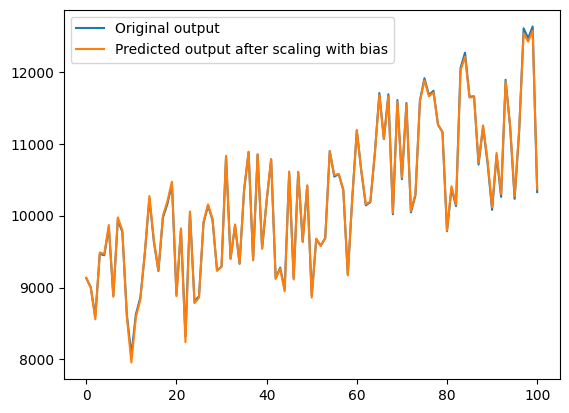

In [28]:
w_scale = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_scaled.T, X_scaled)),X_scaled.T),y)
y_pred_scale = np.matmul(X_scaled,w_scale)
plt.plot(y, label = 'Original output')
plt.plot(y_pred_scale, label = 'Predicted output after scaling with bias')
plt.legend()
plt.show()

In [29]:
sse_scale_bias = float(np.sum((y-(y_pred_scale).reshape(101))**2))
sse_scale_bias

71877.84134016854

### Lets try to consider only x1 and x4 for prediction

In [30]:
X = df[['x1','x4']]

X_2_scale = StandardScaler().fit_transform(X)

In [31]:
X_2_scale.shape

(101, 2)

In [32]:
X_2_scale = np.hstack([np.ones((X_2_scale.shape[0], 1)), X_2_scale])

In [33]:
w_2_scale = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_2_scale.T, X_2_scale)),X_2_scale.T),y)


In [34]:
w_2_scale

array([10244.46029703,  -723.19972051,  1739.10972877])

In [35]:
y_2_pred = np.matmul(X_2_scale,w_2_scale)

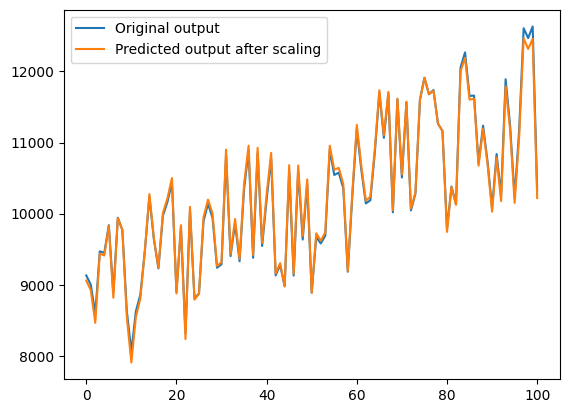

In [36]:
plt.plot(y, label = 'Original output')
plt.plot(y_2_pred, label = 'Predicted output after scaling')
plt.legend()
plt.show()

In [37]:
sse_scale_bias_2 = float(np.sum((y-(y_2_pred).reshape(101))**2))
sse_scale_bias_2

360161.13813014753

Having all features resulted in lower loss than choosing only x1 and x4 for training. Lets also try to use some techniques like PCA to create new set of features and experiment with it. Before that lets try lazy regressor.

## Lazy regressor

In [38]:
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

models, predictions = reg.fit(X_scaled,X_scaled,y,y)

print(models)

100%|██████████| 42/42 [00:04<00:00,  9.78it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 160
[LightGBM] [Info] Number of data points in the train set: 101, number of used features: 5
[LightGBM] [Info] Start training from score 10244.460319
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [39]:
predictions

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,1.00,1.00,0.00,0.02
ExtraTreeRegressor,1.00,1.00,0.00,0.02
ExtraTreesRegressor,1.00,1.00,0.00,0.17
GaussianProcessRegressor,1.00,1.00,0.00,0.04
XGBRegressor,1.00,1.00,0.01,0.34
GradientBoostingRegressor,1.00,1.00,4.27,0.32
RANSACRegressor,1.00,1.00,26.68,0.09
LinearRegression,1.00,1.00,26.68,0.02
TransformedTargetRegressor,1.00,1.00,26.68,0.02


In [40]:
best_model = reg.models[models.index[0]]

y_pred_best = best_model.predict(X_scaled)

In [41]:
sse_scale_bias_best = float(np.sum((y-(y_pred_best).reshape(101))**2))
sse_scale_bias_best

0.0

Without splitting them as train and test, training on the whole data, overfits the data, thus gives zero error. There is no guarantee that it will perform good on unseen data. So let's split the data as train and test set, and lets test which model performs good.

In [42]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state = 42, test_size = 0.3)

models, predictions = reg.fit(X_train,X_test,y_train,y_test)

print(models)

100%|██████████| 42/42 [00:02<00:00, 14.39it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000090 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 120
[LightGBM] [Info] Number of data points in the train set: 70, number of used features: 5
[LightGBM] [Info] Start training from score 10261.412598
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [43]:
best_model = reg.models[models.index[0]]

y_pred_best = best_model.predict(X_scaled)

print(f'Best performing model after splitting them as train test split is {models.index[0]}')

sse_scale_bias_best = float(np.sum((y-(y_pred_best).reshape(101))**2))
sse_scale_bias_best

Best performing model after splitting them as train test split is Ridge


83274.77639959355

The best performing model is Ridge, with the sse of 83k. The OLS solution with the scaled data resulted in the sse of 71k. One possible reason is that, the OLS has access to all the data, but the Ridge regression has access to only a subset of data, as it is split into train and test. Lets try to fit the ridge regression on the complete data and try to find the sse.

In [44]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()

ridge_model.fit(X_scaled, y)

y_pred_ridge = ridge_model.predict(X_scaled)

sse_scale_bias_ridge = float(np.sum((y-(y_pred_ridge).reshape(101))**2))
sse_scale_bias_ridge

79726.44170560532

Still the error is 79k (decreased from 83k) when using ridge regression.

## Lets compare the rmse of our OLS solution with the X_test, and compare its rmse value with the models in lazy regressor
RMSE = sqrt( sum((yhat - y) ** 2) / n)

In [45]:
w_test = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train.T, X_train)),X_train.T),y_train)

In [46]:
results = pd.DataFrame(columns=['Model','RMSE','RMSE by OLS','OLS better than given model'])

rmse_by_ols = np.sqrt(np.sum((np.matmul(X_test,w_test) - y_test)**2)/len(X_test))

print(rmse_by_ols)
models


39.853420089746315


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Ridge,1.00,1.00,37.50,0.02
Lasso,1.00,1.00,38.01,0.02
LassoCV,1.00,1.00,38.03,0.18
RidgeCV,1.00,1.00,38.14,0.02
SGDRegressor,1.00,1.00,38.24,0.03
LassoLars,1.00,1.00,38.47,0.03
BayesianRidge,1.00,1.00,38.85,0.02
LassoLarsCV,1.00,1.00,39.85,0.02
Lars,1.00,1.00,39.85,0.02


The error by OLS solution is similar to LinearRegression model from the lazyRegressor (it should be). But when training the ridge regressor(best performing) with all the data, and testing again with all the data resulted in the sse of 79k, which is greater than 71k produced by the OLS solution. Thus OLS solution performs better.

## Lets try using PCA to modify and reduce the number of features.

In [47]:
from sklearn.decomposition import PCA

X_pca = PCA(n_components=3).fit_transform(X_scaled)


In [48]:
X_pca.shape

(101, 3)

In [49]:
X_pca = np.hstack([np.ones((X_pca.shape[0], 1)), X_pca])

Lets find the OLS solution

In [50]:
w_ols_pca = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_pca.T, X_pca)),X_pca.T),y)

y_pred_pca = np.matmul(X_pca,w_ols_pca)

sse_ols_pca = float(np.sum((y-y_pred_pca.reshape(101))**2))
sse_ols_pca

4428210.6778120445

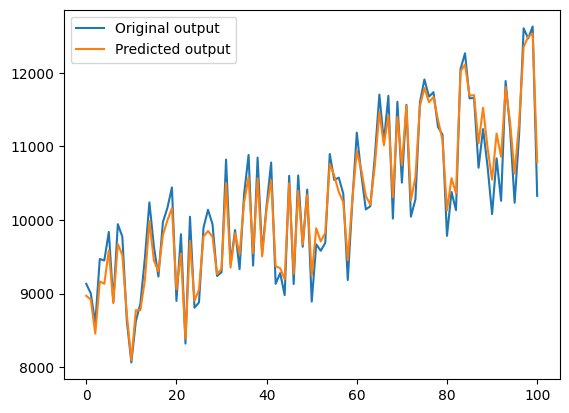

In [51]:
plt.plot(y, label = 'Original output')
plt.plot(y_pred_pca, label = 'Predicted output')
plt.legend()
plt.show()

Even tough highly correlated features are given most importance (via pca), still the error is higher than expected (as expected) as we are not using all the available features (we are losing some information).

## Summary

We first tried to fit the data(original without any preprocessing), directly with the OLS solution, that resulted in some high sse loss. Then we performed EDA on the dataset and found out how some features are highly correlated with the target variable. Then we performed normalisation of the datraset to assign equal importance to the features. Then we tried to fit the OLS solution and abserved that there is a huge displacement between the actual variable and the reason for this is the lack of bias. Then we introduced a bias feature with values as 1. Then the OLS solution gave the sse loss of 71k. Then we used lazy regressor. The best performing model was ridge regressor. The RMSE of ridge was lesser than our OLS in the test data. By when trained on the whole data and tested on all datapoints, the ols solution has lesser SSE loss than the ridge regressor. Then we tried using PCA since some have features had high correlation with target variable. But it didn't perform well, as we are losing some information when performing PCA. When the number of datapoints are too high such that it becomes computationally very expensive, we can use this dimensionally reduced data to train on to produce good result efficiently. But for this case, OLS on entire normalised dataset outrperformed PCA (as expected).